In [35]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [36]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1
        print(counter)
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

def lot_short_cash_neutral(price_long, price_short, lot_long):
    return roundup((price_long*lot_long)/price_short)

def roundup(value):
    #return int(math.ceil(value / 100.0)) * 100
    ret = int(round(value, -2))
    if (ret <= 0):
        return 100
    return ret

def parameters_input_cash_neutral(pairs, data, lot=100):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        signalStr = row['SignalStr'].split('/')

        y_price = data[y_symbol][0]
        x_price = data[x_symbol][0]

        y_lot = 0
        x_lot = 0
        if (signalStr[0]=='Long'):
            x_lot = lot_short_cash_neutral(y_price, x_price, lot)
            y_lot = lot
        else:
            y_lot = lot_short_cash_neutral(x_price, y_price, lot)
            x_lot = lot

        print('{}: {} ({}) {} <-> {}: {} ({}) {}'.format(\
            signalStr[0], y_symbol, round(y_price, 2), y_lot, signalStr[1], x_symbol, round(x_price, 2), x_lot))
        
def check_coint(pairs, data):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
        print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

In [37]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [38]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-08-21
data: (327, 74)
pairs: (2291, 12)


In [39]:
#data.to_excel('datasets/data_cart.xlsx')

In [40]:
#pairs

In [41]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 2) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,EGIE3,EMBR3,-3.538749,99,0.738558,2.202047,2,Long/Short,0.378226,9,"100,120,140,160,180,200,220,240,250"
1,100,EGIE3,FLRY3,-5.195845,99,0.669203,2.012756,2,Long/Short,0.435165,9,"100,120,140,160,180,200,220,240,250"
2,100,EGIE3,IGTA3,-4.823924,99,0.403290,2.077111,2,Long/Short,0.496560,9,"100,120,140,160,180,200,220,240,250"
3,100,EGIE3,LREN3,-4.792802,99,0.310484,2.301620,2,Long/Short,0.462118,9,"100,120,140,160,180,200,220,240,250"
4,100,EGIE3,MULT3,-4.230102,99,0.547303,2.185582,2,Long/Short,0.444407,9,"100,120,140,160,180,200,220,240,250"
5,100,ENBR3,UGPA3,-4.175425,99,0.454780,2.189453,2,Long/Short,0.624467,9,"100,120,140,160,180,200,220,240,250"
6,100,ENGI11,GNDI3,-4.983359,99,0.633371,2.046129,2,Long/Short,0.470700,9,"100,120,140,160,180,200,220,240,250"
7,100,RADL3,SULA11,-4.597292,99,0.837676,2.158928,2,Long/Short,0.410329,9,"100,120,140,160,180,200,220,240,250"
8,100,RADL3,YDUQ3,-4.358014,99,0.500086,2.404679,2,Long/Short,0.387360,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

0


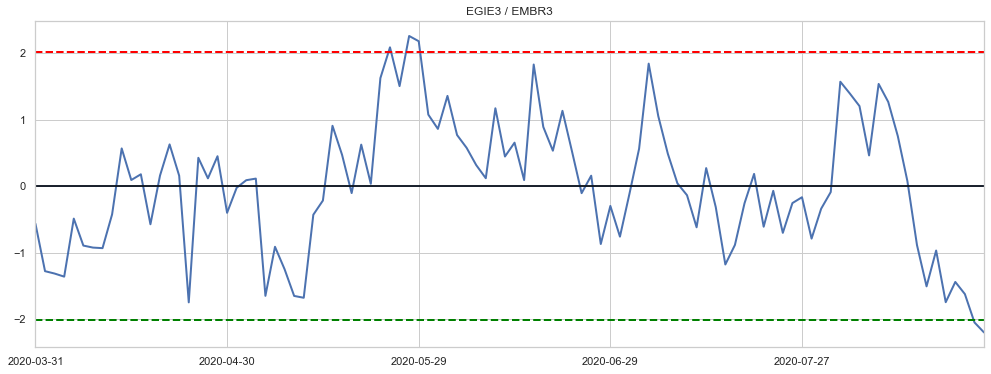

1


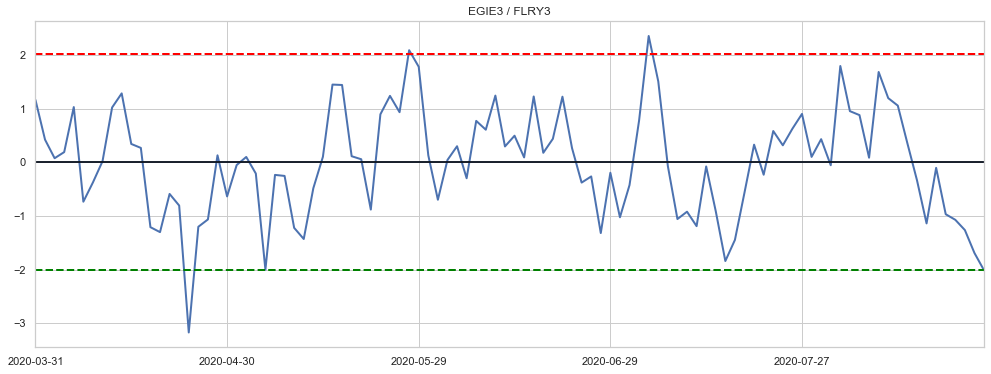

2


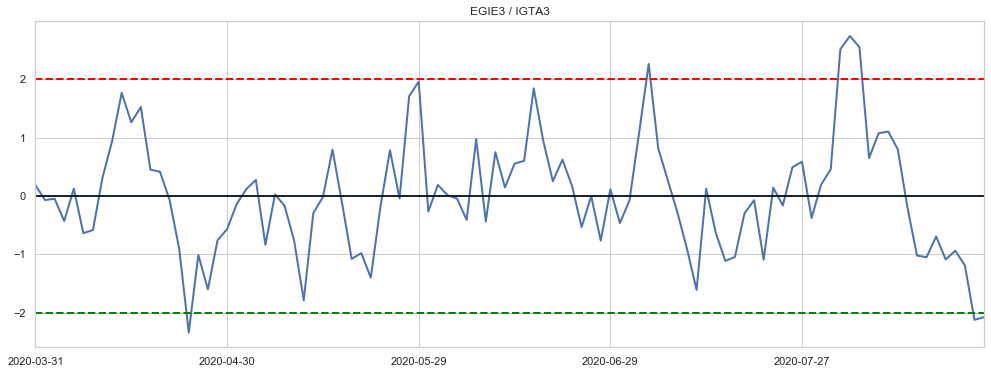

3


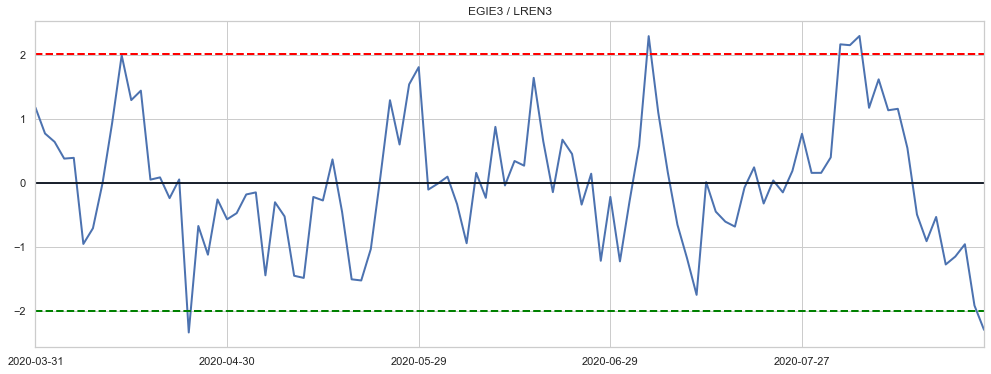

4


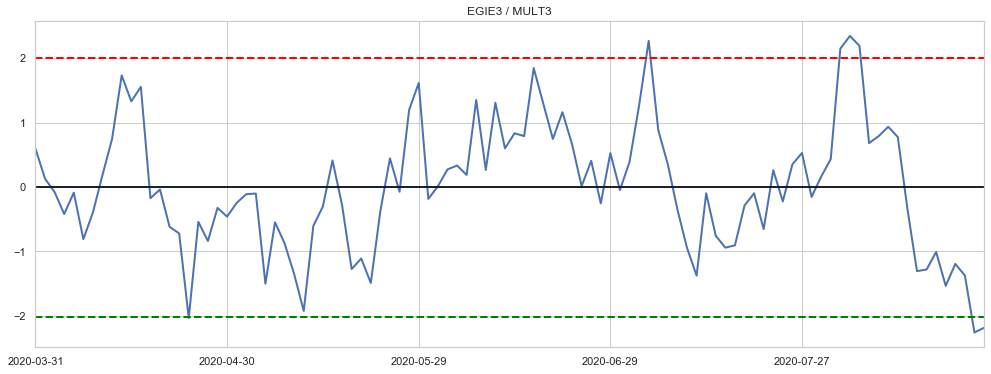

5


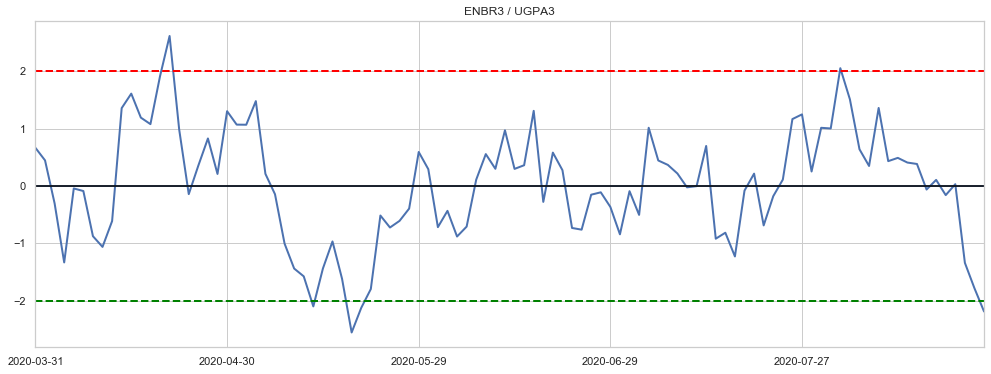

6


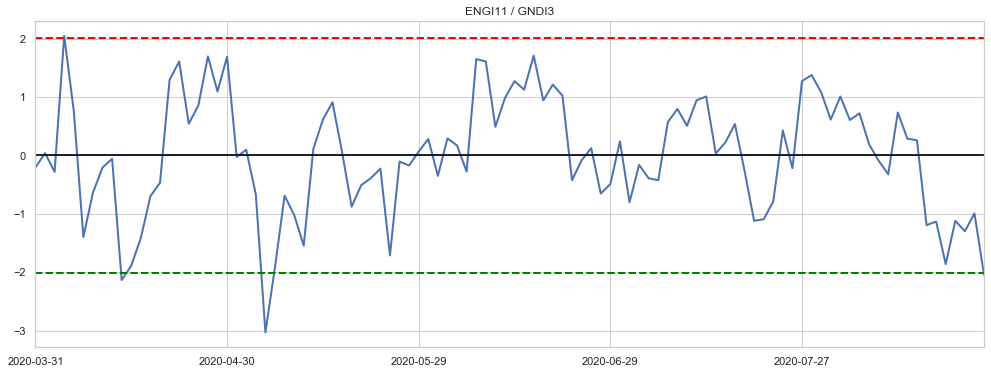

7


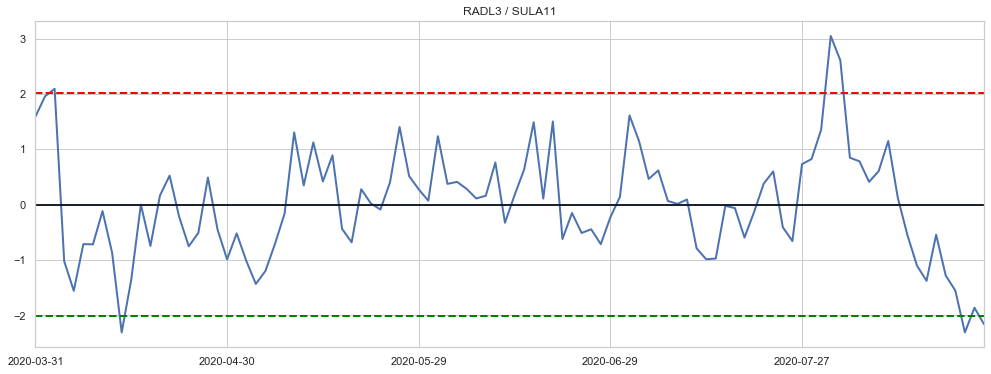

8


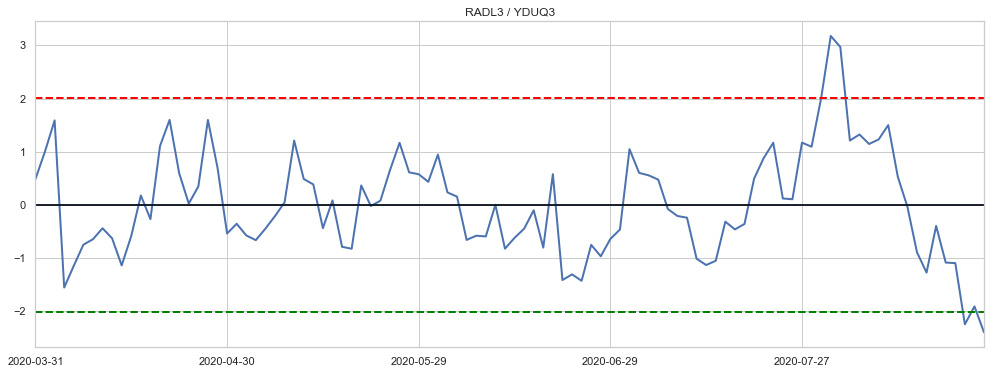

In [54]:
plot_pairs(pairs_signal, data)
#mult.plot_residue(mult.residue(data['HAPV3'], data['IRBR3'], 100))

In [43]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [44]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [45]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,EGIE3,UGPA3,-4.622460,99,0.729987,2.321470,2,Long/Short,0.518659,9,"100,120,140,160,180,200,220,240,250"
1,100,GGBR4,VIVT4,-4.384355,99,0.063620,2.170817,2,Short/Long,0.212726,9,"100,120,140,160,180,200,220,240,250"
2,100,RADL3,UGPA3,-4.404214,99,1.220259,2.398343,2,Long/Short,0.399844,9,"100,120,140,160,180,200,220,240,250"
3,100,EGIE3,EMBR3,-5.253019,99,0.673937,2.117169,2,Long/Short,0.324547,9,"100,120,140,160,180,200,220,240,250"
4,100,ENGI11,GNDI3,-4.829187,99,0.557605,2.022712,2,Long/Short,0.500966,9,"100,120,140,160,180,200,220,240,250"
5,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,Long/Short,0.641191,9,"100,120,140,160,180,200,220,240,250"


In [46]:
"""new = pairs_signal.iloc[[20,12,1]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"new = pairs_signal.iloc[[20,12,1]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [47]:
#oper.to_csv('datasets/operations.csv', index=False)

In [48]:
check_coint(oper, data)

EGIE3/UGPA3, 100, True, 99
GGBR4/VIVT4, 100, True, 99
RADL3/UGPA3, 100, True, 99
EGIE3/EMBR3, 100, True, 99
ENGI11/GNDI3, 100, True, 99
ABEV3/BPAC11, 100, True, 95


0


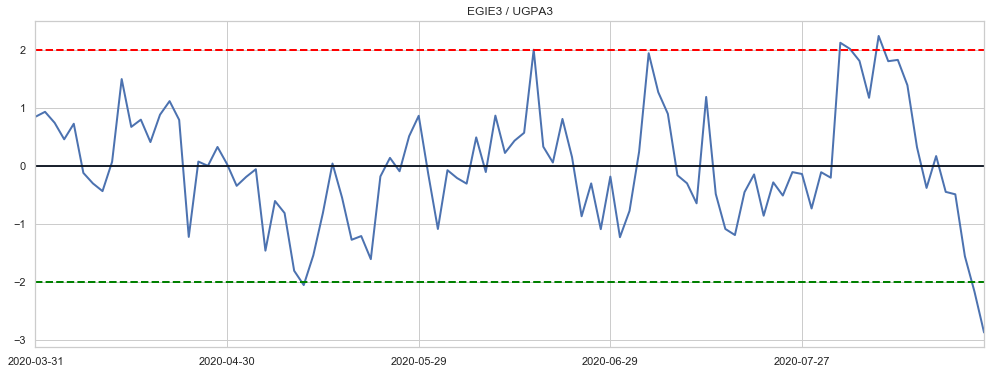

1


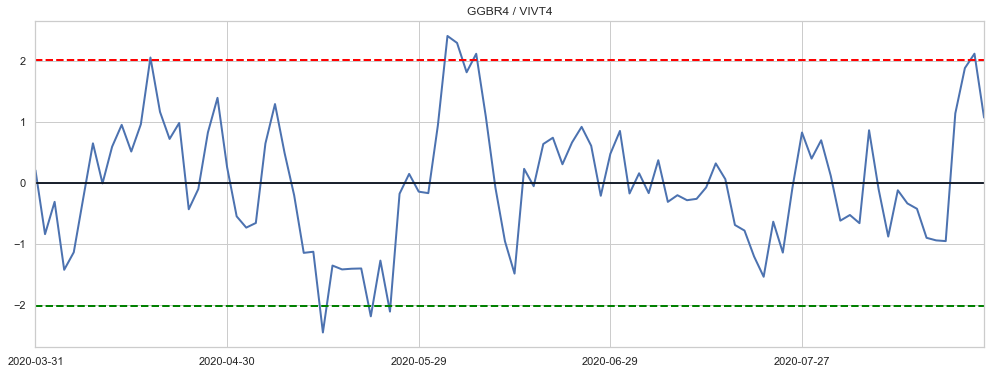

2


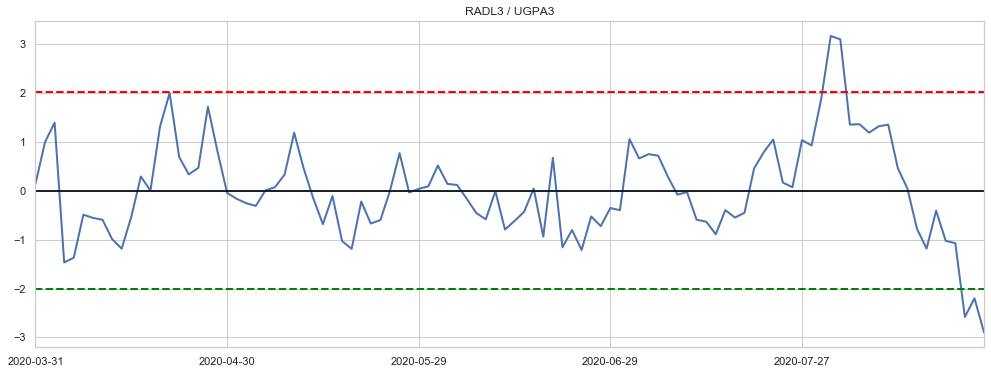

3


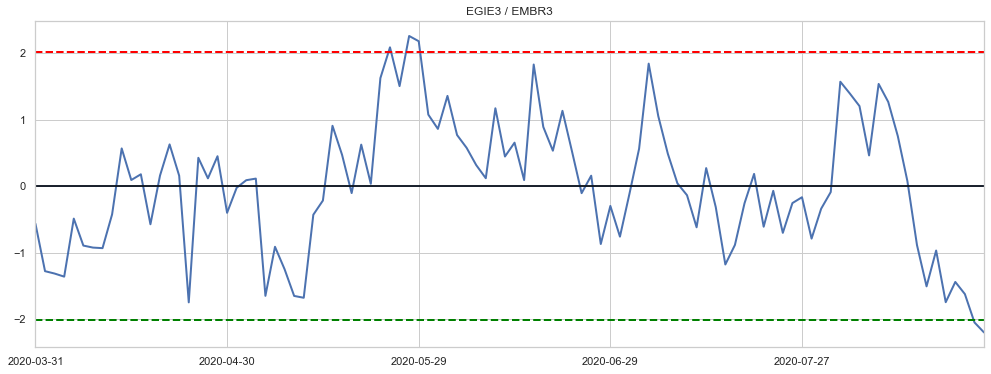

4


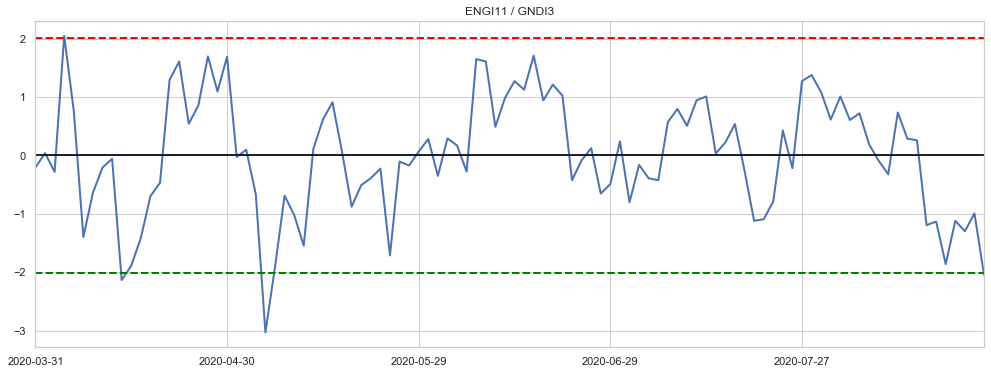

5


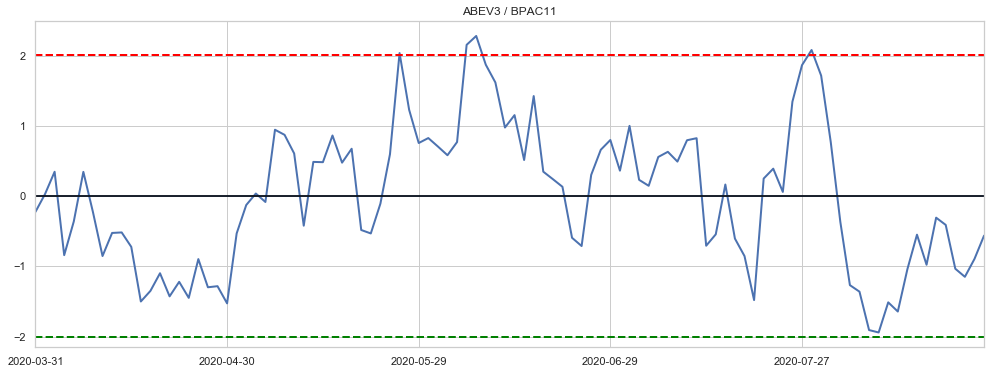

In [49]:
plot_pairs(oper, data)

In [50]:
#df.to_excel('datasets/data_cart.xlsx')

In [51]:
parameters_input_cash_neutral(oper, data)

Long: EGIE3 (42.7) 100 <-> Short: UGPA3 (20.73) 200
Short: GGBR4 (19.68) 300 <-> Long: VIVT4 (49.31) 100
Long: RADL3 (107.5) 100 <-> Short: UGPA3 (20.73) 500
Long: EGIE3 (42.7) 100 <-> Short: EMBR3 (7.24) 600
Long: ENGI11 (45.14) 100 <-> Short: GNDI3 (69.17) 100
Long: ABEV3 (12.97) 100 <-> Short: BPAC11 (82.63) 100


In [52]:
"""
EGIE3-UGPA3
GGBR4-VIVT4
RADL3-UGPA3
"""

'\nEGIE3-UGPA3\nGGBR4-VIVT4\nRADL3-UGPA3\n'

In [53]:
last = data[data.index<'2020-08-14']